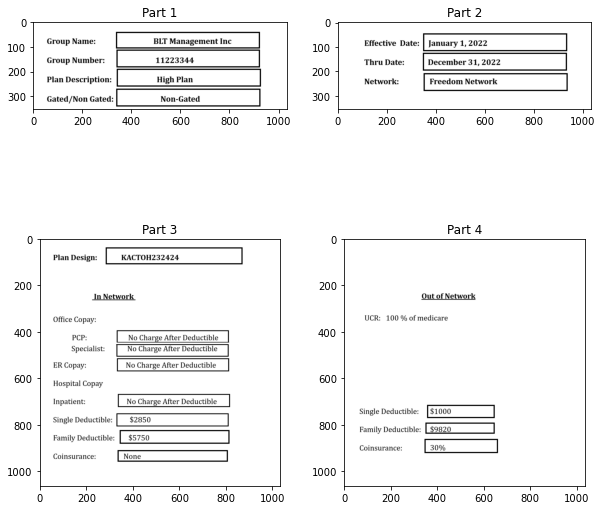

True

In [155]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Read the image
image = cv2.imread(r"C:\Users\Subhadeep\Downloads\1.png")

# Get the dimensions of the image
height, width, _ = image.shape

# Split the image into four parts with adjusted heights for parts 1, 2, and 3
part1 = image[0:height//4, 0:width//2]  # Top-left quarter with 25% of the height
part2 = image[0:height//4, width//2:width]  # Top-right quarter with 25% of the height
part3 = image[height//4:height, 0:width//2]  # Bottom-left quarter with 75% of the height
part4 = image[height//4:height, width//2:width]  # Bottom-right quarter with 75% of the height




# Display each part using Matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(cv2.cvtColor(part1, cv2.COLOR_BGR2RGB)), plt.title('Part 1')
plt.subplot(222), plt.imshow(cv2.cvtColor(part2, cv2.COLOR_BGR2RGB)), plt.title('Part 2')
plt.subplot(223), plt.imshow(cv2.cvtColor(part3, cv2.COLOR_BGR2RGB)), plt.title('Part 3')
plt.subplot(224), plt.imshow(cv2.cvtColor(part4, cv2.COLOR_BGR2RGB)), plt.title('Part 4')
plt.show()

# If you want to save each part to a file:
cv2.imwrite('part1.jpg', part1)
cv2.imwrite('part2.jpg', part2)
cv2.imwrite('part3.jpg', part3)
cv2.imwrite('part4.jpg', part4)


In [156]:
import pytesseract
import pandas as pd
# Set the path to the Tesseract executable (update this with your actual path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

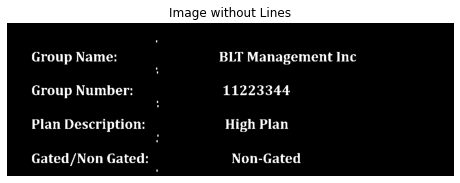

In [157]:
class LineRemover:
    def __init__(self, image_with_padding_path):
        self.image_with_padding = img1
        self.grey = None
        self.thresholded_image = None
        self.inverted_image = None

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image_with_padding, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 127, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.inverted_image, cv2.COLOR_BGR2RGB))
        plt.title('Inverted Binary Image')
        plt.axis('off')
        plt.show()
        
    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

    def display_image_with_eroded_vertical_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.vertical_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Vertical Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def erode_horizontal_lines(self):
        ver = np.array([[1], [1], [1], [1], [1], [1], [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)
        
    def display_image_with_eroded_horizontal_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.horizontal_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with horizontal Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def display_image_with_combined_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with combined eroded lines')
        plt.axis('off')
        plt.show()
    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=2)

    def display_thickened_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image_dilated, cv2.COLOR_BGR2RGB))
        plt.title('Image with Thickened Lines')
        plt.axis('off')
        plt.show()
        
    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)
        
    def display_image_without_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines, cv2.COLOR_BGR2RGB))
        plt.title('Image without Lines')
        plt.axis('off')
        plt.show()
    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)
        
    def display_image_without_noise(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines_noise_removed, cv2.COLOR_BGR2RGB))
        plt.title('Image without noise')
        plt.axis('off')
        plt.show()

img1 = cv2.imread('part1.jpg')
# Instantiate the class
line_remover = LineRemover(img1)

# Call the preprocessing methods
line_remover.grayscale_image()
line_remover.threshold_image()
line_remover.invert_image()
line_remover.erode_vertical_lines()
line_remover.erode_horizontal_lines()
line_remover.combine_eroded_images()
line_remover.dilate_combined_image_to_make_lines_thicker()
line_remover.subtract_combined_and_dilated_image_from_original_image()

# Display the image without lines
line_remover.display_image_without_lines(line_remover.image_without_lines)

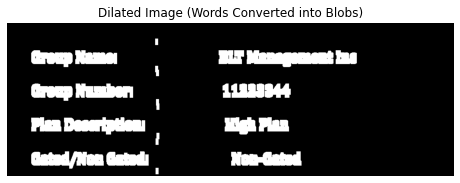

In [158]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class BlobConverter:
    def __init__(self, image_without_lines_noise_removed):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = None
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(5, 5)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(5, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.dilated_image, cv2.COLOR_BGR2RGB))
        plt.title('Dilated Image (Words Converted into Blobs)')
        plt.axis('off')
        plt.show()
        
    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines)

# Apply Gaussian blur
blob_converter.apply_gaussian_blur()

# Call the method to dilate the image
blob_converter.dilate_image()

# Display the dilated image
blob_converter.display_image()

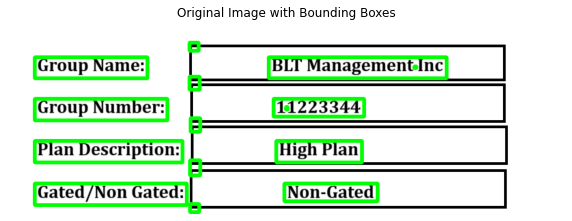

In [159]:
class BlobConverter:
    def __init__(self, image_without_lines_noise_removed, original_image_with_padding):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = original_image_with_padding
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(15, 15)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(15, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines, img1)

# Call the methods
blob_converter.dilate_image()
blob_converter.find_contours()
blob_converter.convert_contours_to_bounding_boxes()

# Display the original isolated image with padding with bounding boxes
blob_converter.display_image_with_bounding_boxes()

In [160]:
tt1=blob_converter.dilated_image
contours1, hierarchy1 = cv2.findContours(tt1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [161]:
(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")
#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
    
#sorting height values
heightlist.sort()

sportion = int(.5*len(heightlist))
eportion = int(0.05*len(heightlist))

In [162]:
import statistics
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

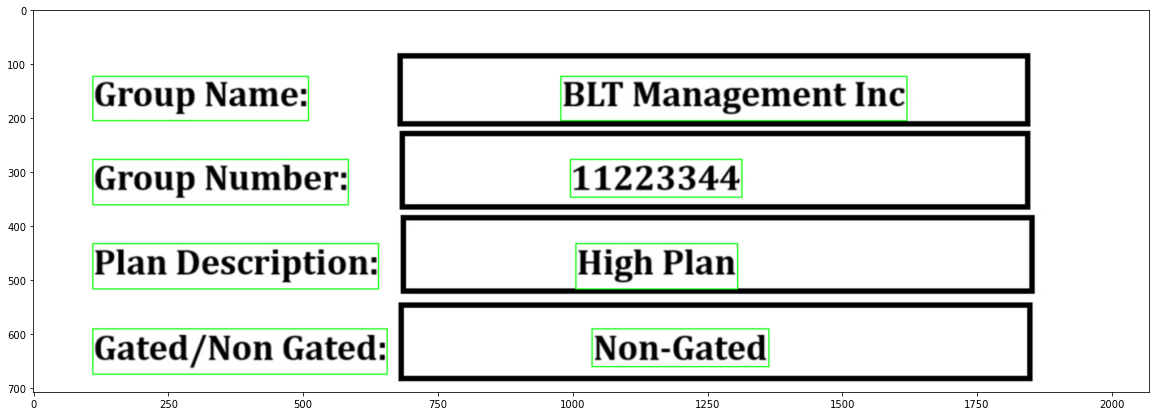

In [163]:
#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = img1.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    
plt.figure(figsize=(20,20))
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [164]:
from PIL import Image

# Convert the numpy array to PIL Image
image = Image.fromarray(img1)

# Sort the bounding boxes based on y-coordinate first, then x-coordinate
sorted_boxes = sorted(box, key=lambda b: (b[1], b[0]))
# Function to extract text from each bounding box
# Padding size (in pixels) to add around the bounding box
padding = 10

# Function to extract text from each bounding box
def extract_text_from_box(image, box, padding):
    x1, y1, width, height = box
    # Add padding around the bounding box
    x1 -= padding
    y1 -= padding
    width += 2 * padding
    height += 2 * padding
    cropped_image = image.crop((x1, y1, x1+width, y1+height))
    text = pytesseract.image_to_string(cropped_image)
    return text.strip()

# Extract text from each bounding box and store them in a list
text_list = []
for bbox in sorted_boxes:
    text = extract_text_from_box(image, bbox, padding)
    text_list.append(text)

print(text_list)

['Group Name:', 'BLT Management Inc', 'Group Number:', '11223344', 'Plan Description:', 'High Plan', 'Gated/Non Gated:', 'Non-Gated']


### Part 2

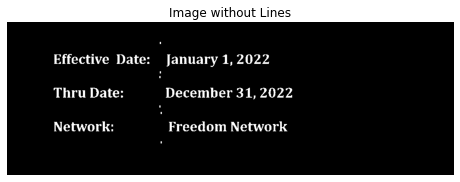

In [165]:
class LineRemover:
    def __init__(self, image_with_padding_path):
        self.image_with_padding = img2
        self.grey = None
        self.thresholded_image = None
        self.inverted_image = None

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image_with_padding, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 127, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.inverted_image, cv2.COLOR_BGR2RGB))
        plt.title('Inverted Binary Image')
        plt.axis('off')
        plt.show()
        
    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

    def display_image_with_eroded_vertical_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.vertical_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Vertical Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def erode_horizontal_lines(self):
        ver = np.array([[1], [1], [1], [1], [1], [1], [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)
        
    def display_image_with_eroded_horizontal_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.horizontal_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with horizontal Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def display_image_with_combined_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with combined eroded lines')
        plt.axis('off')
        plt.show()
    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=2)

    def display_thickened_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image_dilated, cv2.COLOR_BGR2RGB))
        plt.title('Image with Thickened Lines')
        plt.axis('off')
        plt.show()
        
    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)
        
    def display_image_without_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines, cv2.COLOR_BGR2RGB))
        plt.title('Image without Lines')
        plt.axis('off')
        plt.show()
    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)
        
    def display_image_without_noise(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines_noise_removed, cv2.COLOR_BGR2RGB))
        plt.title('Image without noise')
        plt.axis('off')
        plt.show()

img2 = cv2.imread('part2.jpg')
# Instantiate the class
line_remover = LineRemover(img2)

# Call the preprocessing methods
line_remover.grayscale_image()
line_remover.threshold_image()
line_remover.invert_image()
line_remover.erode_vertical_lines()
line_remover.erode_horizontal_lines()
line_remover.combine_eroded_images()
line_remover.dilate_combined_image_to_make_lines_thicker()
line_remover.subtract_combined_and_dilated_image_from_original_image()

# Display the image without lines
line_remover.display_image_without_lines(line_remover.image_without_lines)

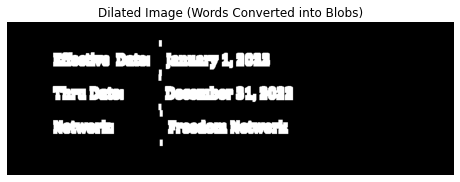

In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class BlobConverter:
    def __init__(self, image_without_lines_noise_removed):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = None
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(5, 5)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(5, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.dilated_image, cv2.COLOR_BGR2RGB))
        plt.title('Dilated Image (Words Converted into Blobs)')
        plt.axis('off')
        plt.show()
        
    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines)

# Apply Gaussian blur
blob_converter.apply_gaussian_blur()

# Call the method to dilate the image
blob_converter.dilate_image()

# Display the dilated image
blob_converter.display_image()

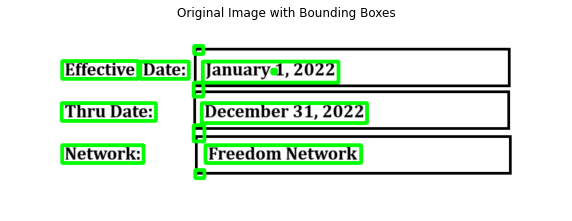

In [167]:
class BlobConverter:
    def __init__(self, image_without_lines_noise_removed, original_image_with_padding):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = original_image_with_padding
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(15, 15)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(15, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines, img2)

# Call the methods
blob_converter.dilate_image()
blob_converter.find_contours()
blob_converter.convert_contours_to_bounding_boxes()

# Display the original isolated image with padding with bounding boxes
blob_converter.display_image_with_bounding_boxes()

In [168]:
tt1=blob_converter.dilated_image
contours1, hierarchy1 = cv2.findContours(tt1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [169]:
(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")
#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
    
#sorting height values
heightlist.sort()

sportion = int(.5*len(heightlist))
eportion = int(0.05*len(heightlist))


import statistics
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

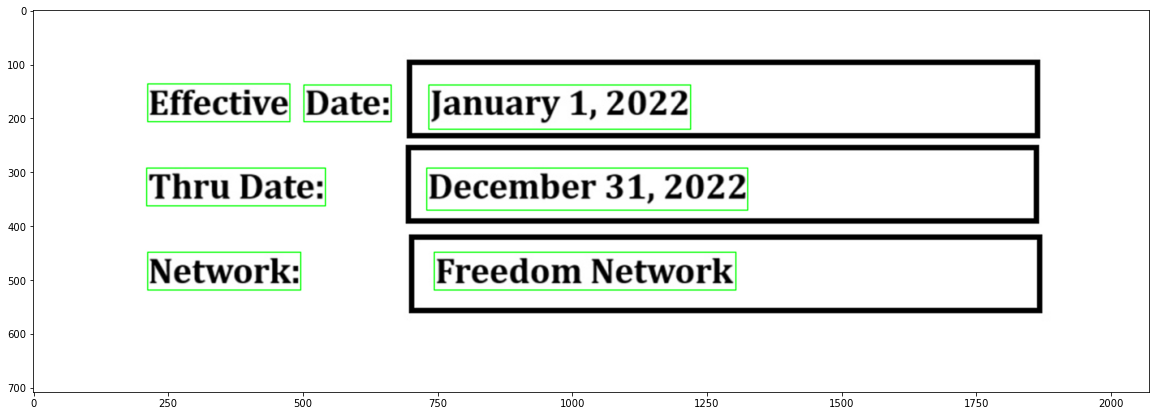

In [170]:
#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = img2.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    
plt.figure(figsize=(20,20))
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [171]:
box

[[102, 70, 141, 33],
 [363, 71, 252, 39],
 [247, 71, 90, 32],
 [361, 148, 307, 37],
 [101, 148, 175, 33],
 [368, 226, 289, 33],
 [102, 226, 151, 33]]

In [172]:
from PIL import Image

# Convert the numpy array to PIL Image
image = Image.fromarray(img2)

# Sort the bounding boxes based on y-coordinate first, then x-coordinate
sorted_boxes = sorted(box, key=lambda b: (b[1], b[0]))
# Function to extract text from each bounding box
# Padding size (in pixels) to add around the bounding box
padding = 10

# Function to extract text from each bounding box
def extract_text_from_box(image, box, padding):
    x1, y1, width, height = box
    # Add padding around the bounding box
    x1 -= padding
    y1 -= padding
    width += 2 * padding
    height += 2 * padding
    cropped_image = image.crop((x1, y1, x1+width, y1+height))
    text = pytesseract.image_to_string(cropped_image)
    return text.strip()

# Extract text from each bounding box and store them in a list

for bbox in sorted_boxes:
    text = extract_text_from_box(image, bbox, padding)
    text_list.append(text)

print(text_list)

['Group Name:', 'BLT Management Inc', 'Group Number:', '11223344', 'Plan Description:', 'High Plan', 'Gated/Non Gated:', 'Non-Gated', 'Effective', 'Date:', 'January 1, 2022', 'Thru Date:', 'December 31, 2022', 'Network:', 'Freedom Network']


### Part 3

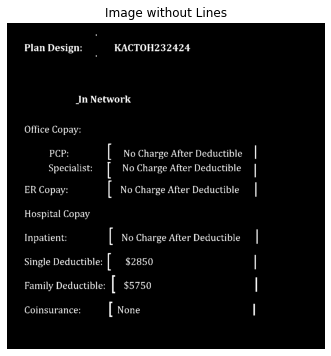

In [173]:
class LineRemover:
    def __init__(self, image_with_padding_path):
        self.image_with_padding = img3
        self.grey = None
        self.thresholded_image = None
        self.inverted_image = None

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image_with_padding, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 127, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.inverted_image, cv2.COLOR_BGR2RGB))
        plt.title('Inverted Binary Image')
        plt.axis('off')
        plt.show()
        
    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

    def display_image_with_eroded_vertical_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.vertical_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Vertical Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def erode_horizontal_lines(self):
        ver = np.array([[1], [1], [1], [1], [1], [1], [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)
        
    def display_image_with_eroded_horizontal_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.horizontal_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with horizontal Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def display_image_with_combined_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with combined eroded lines')
        plt.axis('off')
        plt.show()
    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=2)

    def display_thickened_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image_dilated, cv2.COLOR_BGR2RGB))
        plt.title('Image with Thickened Lines')
        plt.axis('off')
        plt.show()
        
    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)
        
    def display_image_without_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines, cv2.COLOR_BGR2RGB))
        plt.title('Image without Lines')
        plt.axis('off')
        plt.show()
    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)
        
    def display_image_without_noise(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines_noise_removed, cv2.COLOR_BGR2RGB))
        plt.title('Image without noise')
        plt.axis('off')
        plt.show()

img3 = cv2.imread('part3.jpg')
# Instantiate the class
line_remover = LineRemover(img3)

# Call the preprocessing methods
line_remover.grayscale_image()
line_remover.threshold_image()
line_remover.invert_image()
line_remover.erode_vertical_lines()
line_remover.erode_horizontal_lines()
line_remover.combine_eroded_images()
line_remover.dilate_combined_image_to_make_lines_thicker()
line_remover.subtract_combined_and_dilated_image_from_original_image()

# Display the image without lines
line_remover.display_image_without_lines(line_remover.image_without_lines)

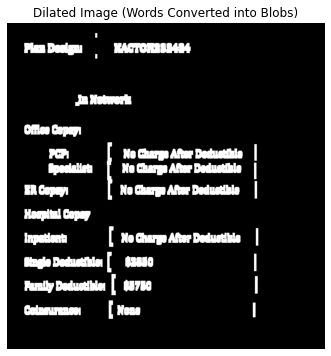

In [174]:
class BlobConverter:
    def __init__(self, image_without_lines_noise_removed):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = None
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(5, 5)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(5, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.dilated_image, cv2.COLOR_BGR2RGB))
        plt.title('Dilated Image (Words Converted into Blobs)')
        plt.axis('off')
        plt.show()
        
    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines)

# Apply Gaussian blur
blob_converter.apply_gaussian_blur()

# Call the method to dilate the image
blob_converter.dilate_image()

# Display the dilated image
blob_converter.display_image()

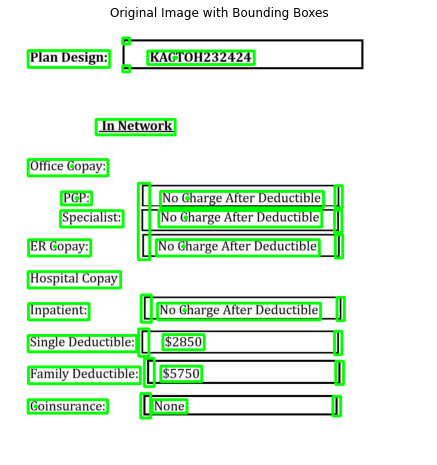

In [175]:
class BlobConverter:
    def __init__(self, image_without_lines_noise_removed, original_image_with_padding):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = original_image_with_padding
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(15, 15)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(15, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines, img3)

# Call the methods
blob_converter.dilate_image()
blob_converter.find_contours()
blob_converter.convert_contours_to_bounding_boxes()

# Display the original isolated image with padding with bounding boxes
blob_converter.display_image_with_bounding_boxes()

In [176]:
tt1=blob_converter.dilated_image
contours1, hierarchy1 = cv2.findContours(tt1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)


(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")
#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
    
#sorting height values
heightlist.sort()

sportion = int(.5*len(heightlist))
eportion = int(0.05*len(heightlist))


import statistics
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

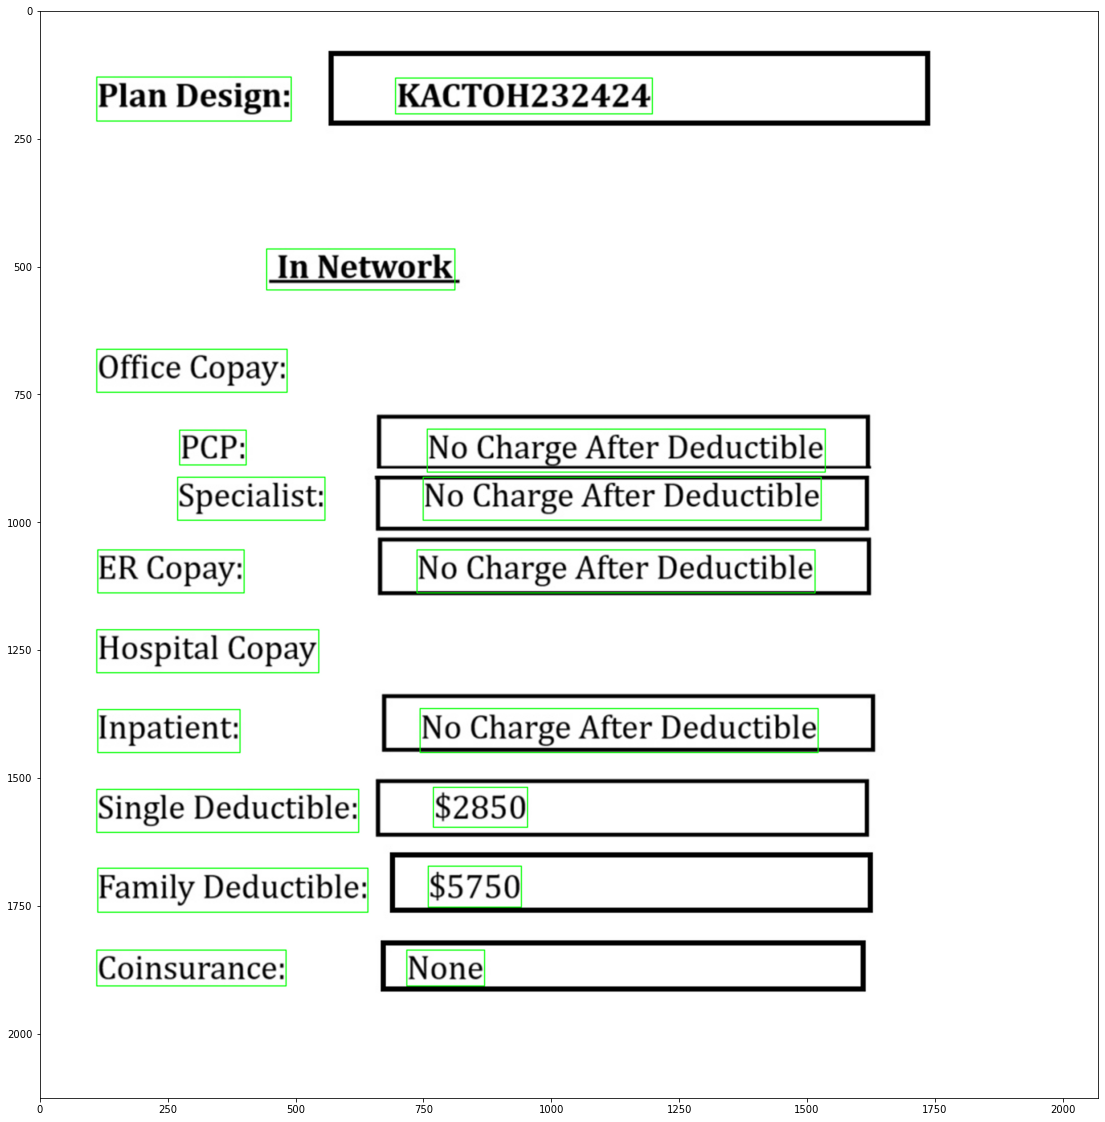

In [177]:
#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = img3.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.5*medianheight and w/h > 0.8):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    
plt.figure(figsize=(20,20))
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [178]:
from PIL import Image

# Convert the numpy array to PIL Image
image = Image.fromarray(img3)

# Sort the bounding boxes based on y-coordinate first, then x-coordinate
sorted_boxes = sorted(box, key=lambda b: (b[1], b[0]))
# Function to extract text from each bounding box
# Padding size (in pixels) to add around the bounding box
padding = 10

# Function to extract text from each bounding box
def extract_text_from_box(image, box, padding):
    x1, y1, width, height = box
    # Add padding around the bounding box
    x1 -= padding
    y1 -= padding
    width += 2 * padding
    height += 2 * padding
    cropped_image = image.crop((x1, y1, x1+width, y1+height))
    text = pytesseract.image_to_string(cropped_image)
    return text.strip()

# Extract text from each bounding box and store them in a list
in_text=[]
for bbox in sorted_boxes:
    text = extract_text_from_box(image, bbox, padding)
    in_text.append(text)
    
for i in range(len(in_text)):
    if ':' in in_text[i]:
        in_text[i] = 'IN ' + in_text[i]

text_list.extend(in_text)
        
print(text_list)

['Group Name:', 'BLT Management Inc', 'Group Number:', '11223344', 'Plan Description:', 'High Plan', 'Gated/Non Gated:', 'Non-Gated', 'Effective', 'Date:', 'January 1, 2022', 'Thru Date:', 'December 31, 2022', 'Network:', 'Freedom Network', 'IN Plan Design:', 'KACTOH232424', 'In Network', 'IN Office Copay:', 'No Charge After Deductible', 'IN PCP:', 'IN Specialist:', 'No Charge After Deductible', 'IN ER Copay:', 'No Charge After Deductible', 'Hospital Copay', 'No Charge After Deductible', 'IN Inpatient:', '$2850', 'IN Single Deductible:', '$5750', 'IN Family Deductible:', 'IN Coinsurance:', 'None']


## Part 4

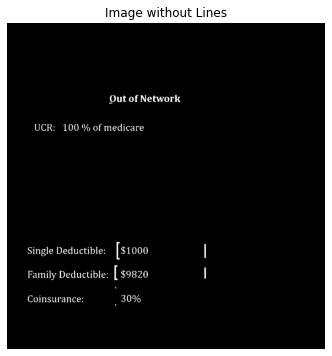

In [179]:
class LineRemover:
    def __init__(self, image_with_padding_path):
        self.image_with_padding = img4
        self.grey = None
        self.thresholded_image = None
        self.inverted_image = None

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image_with_padding, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 127, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.inverted_image, cv2.COLOR_BGR2RGB))
        plt.title('Inverted Binary Image')
        plt.axis('off')
        plt.show()
        
    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

    def display_image_with_eroded_vertical_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.vertical_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Vertical Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def erode_horizontal_lines(self):
        ver = np.array([[1], [1], [1], [1], [1], [1], [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)
        
    def display_image_with_eroded_horizontal_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.horizontal_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with horizontal Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def display_image_with_combined_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with combined eroded lines')
        plt.axis('off')
        plt.show()
    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=2)

    def display_thickened_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image_dilated, cv2.COLOR_BGR2RGB))
        plt.title('Image with Thickened Lines')
        plt.axis('off')
        plt.show()
        
    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)
        
    def display_image_without_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines, cv2.COLOR_BGR2RGB))
        plt.title('Image without Lines')
        plt.axis('off')
        plt.show()
    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)
        
    def display_image_without_noise(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines_noise_removed, cv2.COLOR_BGR2RGB))
        plt.title('Image without noise')
        plt.axis('off')
        plt.show()

img4 = cv2.imread('part4.jpg')
# Instantiate the class
line_remover = LineRemover(img3)

# Call the preprocessing methods
line_remover.grayscale_image()
line_remover.threshold_image()
line_remover.invert_image()
line_remover.erode_vertical_lines()
line_remover.erode_horizontal_lines()
line_remover.combine_eroded_images()
line_remover.dilate_combined_image_to_make_lines_thicker()
line_remover.subtract_combined_and_dilated_image_from_original_image()

# Display the image without lines
line_remover.display_image_without_lines(line_remover.image_without_lines)

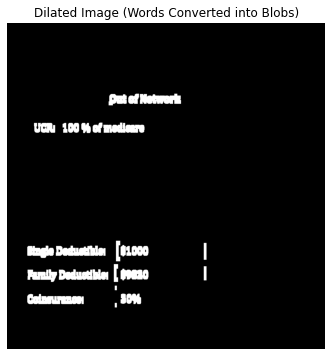

In [180]:
class BlobConverter:
    def __init__(self, image_without_lines_noise_removed):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = None
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(5, 5)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(5, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.dilated_image, cv2.COLOR_BGR2RGB))
        plt.title('Dilated Image (Words Converted into Blobs)')
        plt.axis('off')
        plt.show()
        
    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines)

# Apply Gaussian blur
blob_converter.apply_gaussian_blur()

# Call the method to dilate the image
blob_converter.dilate_image()

# Display the dilated image
blob_converter.display_image()

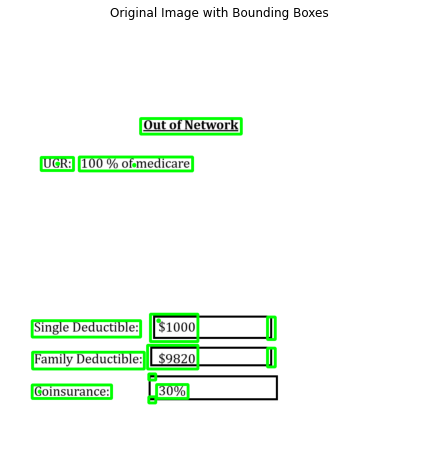

In [181]:
class BlobConverter:
    def __init__(self, image_without_lines_noise_removed, original_image_with_padding):
        self.image_without_lines_noise_removed = image_without_lines_noise_removed
        self.original_image_with_padding = original_image_with_padding
        self.thresholded_image = None
        self.dilated_image = None
        self.contours = None
        self.bounding_boxes = None
        self.image_with_contours_drawn = None
        self.image_with_all_bounding_boxes = None

    def apply_gaussian_blur(self, kernel_size=(7, 7), sigmaX=0):
        self.original_image_with_padding = cv2.GaussianBlur(self.image_without_lines_noise_removed, kernel_size, sigmaX)

    def define_kernel_for_dilation(self, kernel_size=(15, 15)):
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    def dilate_image(self, horizontal_kernel_size=(1, 2), vertical_kernel_size=(15, 10), iterations=1):
        horizontal_kernel = self.define_kernel_for_dilation(horizontal_kernel_size)
        vertical_kernel = self.define_kernel_for_dilation(vertical_kernel_size)
        
        # Dilate the image to remove gaps between words
        self.dilated_image = cv2.dilate(self.image_without_lines_noise_removed, horizontal_kernel, iterations=iterations)
        self.dilated_image = cv2.dilate(self.dilated_image, vertical_kernel, iterations=iterations)

    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image_with_padding.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image_with_padding.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)

    def display_image_with_bounding_boxes(self):
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(self.image_with_all_bounding_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Bounding Boxes')
        plt.axis('off')
        plt.show()

# Instantiate the class
blob_converter = BlobConverter(line_remover.image_without_lines, img4)

# Call the methods
blob_converter.dilate_image()
blob_converter.find_contours()
blob_converter.convert_contours_to_bounding_boxes()

# Display the original isolated image with padding with bounding boxes
blob_converter.display_image_with_bounding_boxes()

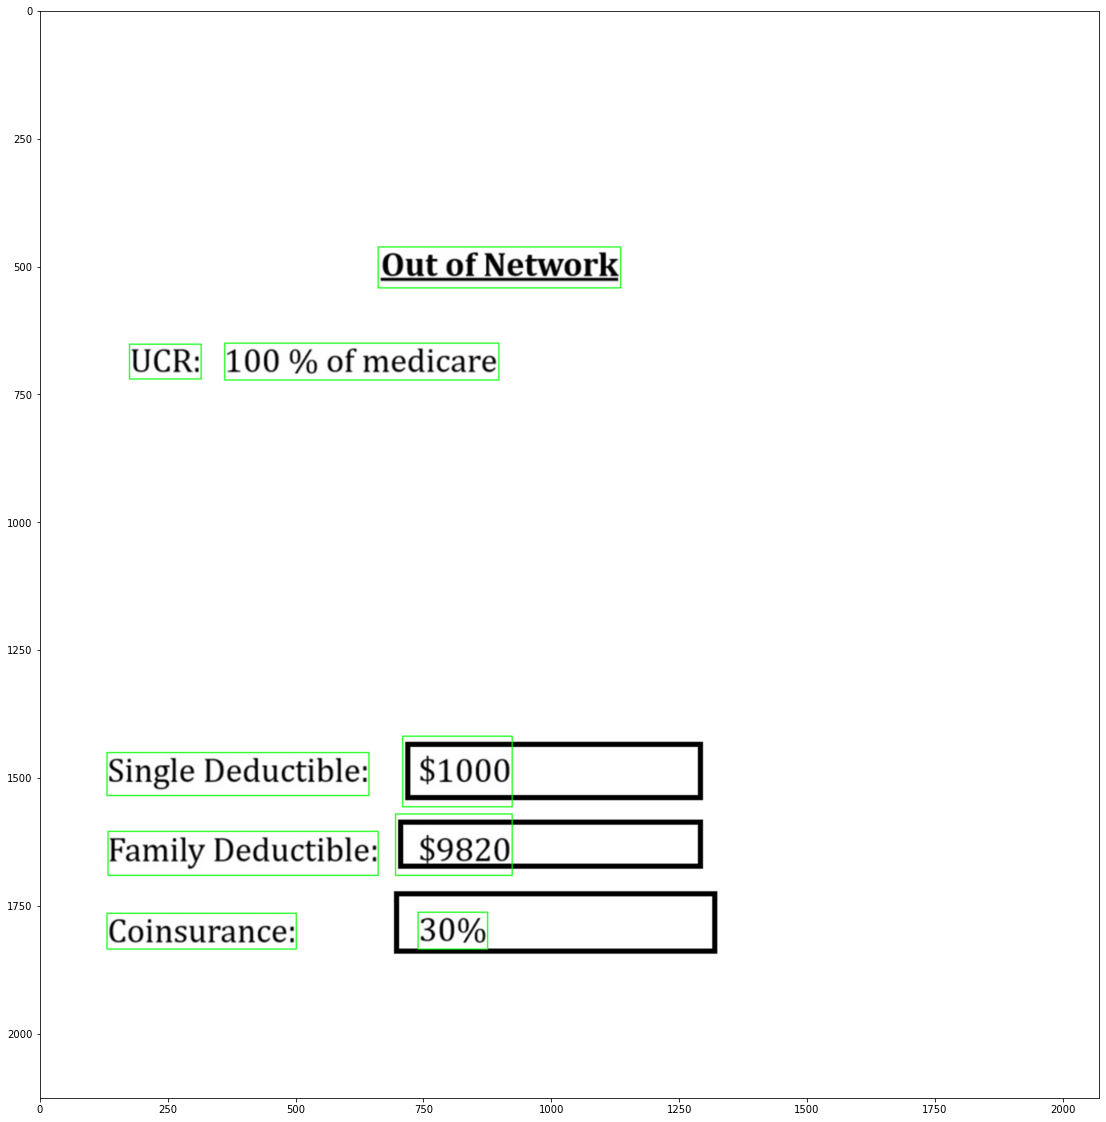

In [182]:
tt1=blob_converter.dilated_image
contours1, hierarchy1 = cv2.findContours(tt1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)


(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")
#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
    
#sorting height values
heightlist.sort()

sportion = int(.5*len(heightlist))
eportion = int(0.05*len(heightlist))


import statistics
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])
    

    
#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = img4.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.5*medianheight and w/h > 0.8):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    
plt.figure(figsize=(20,20))
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [183]:
box

[[326, 233, 246, 38],
 [176, 327, 277, 34],
 [83, 328, 79, 32],
 [350, 711, 116, 67],
 [61, 727, 265, 40],
 [343, 787, 123, 58],
 [62, 804, 273, 41],
 [365, 883, 77, 34],
 [61, 884, 194, 33]]

In [184]:
from PIL import Image

# Convert the numpy array to PIL Image
image = Image.fromarray(img4)

# Sort the bounding boxes based on y-coordinate first, then x-coordinate
sorted_boxes = sorted(box, key=lambda b: (b[1], b[0]))
# Function to extract text from each bounding box
# Padding size (in pixels) to add around the bounding box
padding = 10

# Function to extract text from each bounding box
def extract_text_from_box(image, box, padding):
    x1, y1, width, height = box
    # Add padding around the bounding box
    x1 -= padding
    y1 -= padding
    width += 2 * padding
    height += 2 * padding
    cropped_image = image.crop((x1, y1, x1+width, y1+height))
    text = pytesseract.image_to_string(cropped_image)
    return text.strip()

# Extract text from each bounding box and store them in a list
oon_text=[]
for bbox in sorted_boxes:
    text = extract_text_from_box(image, bbox, padding)
    oon_text.append(text)
    
for i in range(len(oon_text)):
    if ':' in oon_text[i]:
        oon_text[i] = 'OON ' + oon_text[i]

text_list.extend(oon_text)
        
print(text_list)

['Group Name:', 'BLT Management Inc', 'Group Number:', '11223344', 'Plan Description:', 'High Plan', 'Gated/Non Gated:', 'Non-Gated', 'Effective', 'Date:', 'January 1, 2022', 'Thru Date:', 'December 31, 2022', 'Network:', 'Freedom Network', 'IN Plan Design:', 'KACTOH232424', 'In Network', 'IN Office Copay:', 'No Charge After Deductible', 'IN PCP:', 'IN Specialist:', 'No Charge After Deductible', 'IN ER Copay:', 'No Charge After Deductible', 'Hospital Copay', 'No Charge After Deductible', 'IN Inpatient:', '$2850', 'IN Single Deductible:', '$5750', 'IN Family Deductible:', 'IN Coinsurance:', 'None', 'Out of Network', '100 % of medicare', 'OON UCR:', '[$1000', 'OON Single Deductible:', '| $9820', 'OON Family Deductible:', '30%', 'OON Coinsurance:']


In [185]:
text_list

['Group Name:',
 'BLT Management Inc',
 'Group Number:',
 '11223344',
 'Plan Description:',
 'High Plan',
 'Gated/Non Gated:',
 'Non-Gated',
 'Effective',
 'Date:',
 'January 1, 2022',
 'Thru Date:',
 'December 31, 2022',
 'Network:',
 'Freedom Network',
 'IN Plan Design:',
 'KACTOH232424',
 'In Network',
 'IN Office Copay:',
 'No Charge After Deductible',
 'IN PCP:',
 'IN Specialist:',
 'No Charge After Deductible',
 'IN ER Copay:',
 'No Charge After Deductible',
 'Hospital Copay',
 'No Charge After Deductible',
 'IN Inpatient:',
 '$2850',
 'IN Single Deductible:',
 '$5750',
 'IN Family Deductible:',
 'IN Coinsurance:',
 'None',
 'Out of Network',
 '100 % of medicare',
 'OON UCR:',
 '[$1000',
 'OON Single Deductible:',
 '| $9820',
 'OON Family Deductible:',
 '30%',
 'OON Coinsurance:']